In [262]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [ ]:
days = 100

In [248]:
mu_control, sigma_control, n_control = 200, 20, 100
mu_experiment, sigma_experiment, n_experiment = 200, 20, 100

In [249]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [257]:
for day in range(days):
    dayle_data_conrtol = np.random.normal(mu_control, sigma_control, n_control)
    dayle_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_contol = pd.DataFrame({'value': dayle_data_conrtol})
    day_data_contol['date'] = current_date
    day_data_contol['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': dayle_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'
    
    user_data = user_data.append(day_data_experiment).append(day_data_contol)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    current_data_stat = user_data.groupby(['group'], as_index = False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    current_date += 1
daily_data = daily_data.set_index(i for i in range(len(daily_data)))
stat_result = stat_result.set_index(i for i in range(len(stat_result)))

Рассмотрим первый случай, когда средние значения распределений существенно отличаются.<br>
На графиках видно, что критерий показал наличие статистической разности в рассматриваемых выборках, и p-value
очень быстро перешел порог в 5%.<br>

mu_control, sigma_control, n_control = 200, 20, 100.<br>
mu_experiment, sigma_experiment, n_experiment = 205, 20, 100.

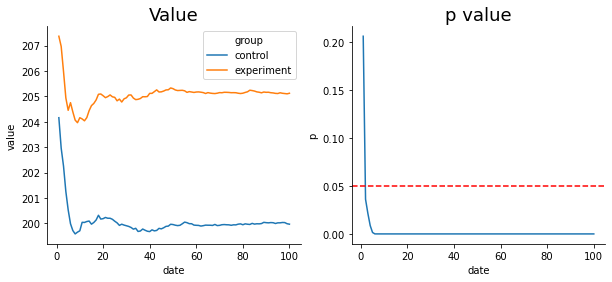

In [149]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
sns.lineplot(data = daily_data, x = "date", y = "value", hue = "group",
    ax = axes[0])
axes [0].set_title("Value", fontsize = 18)

sns.lineplot(data = stat_result, x = 'date', y = 'p',
    ax = axes[1])
axes[1].axhline(0.05, ls = '--', color = 'red')
axes[1].set_title("p value", fontsize = 18)

                      
plt.subplots_adjust(hspace = 0.3)
sns.despine()

Рассмотрим второй случай, когда средние значения распределений различаются, но незначительно.<br>
На графиках видно, что критерий показал наличие статистической разности в рассматриваемых выборках, однако, в период с 10 по 40 день, значение p-value находилось на границе 5%. Прервав процесс наблюдения при первом пересечении p-value границы 5%, существует риск, что при дальнейшем процессе моделирования, тест мог не показать наличия статистической разницы между двумя выборками, и наши дальнейшие  заключения были бы ошибочными.<br>

mu_control, sigma_control, n_control = 200, 20, 100.<br>
mu_experiment, sigma_experiment, n_experiment = 202, 20, 100.

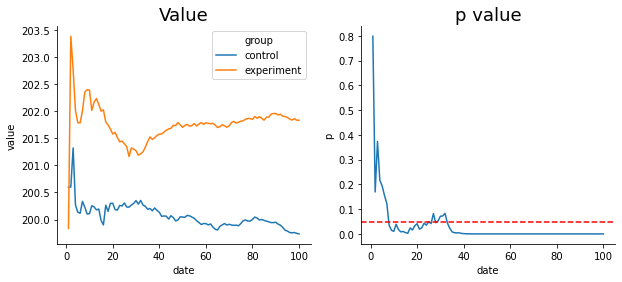

In [161]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
sns.lineplot(data = daily_data, x = "date", y = "value", hue = "group",
    ax = axes[0])
axes [0].set_title("Value", fontsize = 18)

sns.lineplot(data = stat_result, x = 'date', y = 'p',
    ax = axes[1])
axes[1].axhline(0.05, ls = '--', color = 'red')
axes[1].set_title("p value", fontsize = 18)

                      
plt.subplots_adjust(hspace = 0.3)
sns.despine()

Рассмотрим третий случай, когда средние значения распределений совпадают.<br>
На графиках видно, что критерий только смог приблизиться к заданной 5% границе. Также, в отличии от остальных двух случаев, время моделирования здесь намного больше, и нету никаких гарантий, что при продолжении процесса наблюдения, значение p-value снова не станет большим. В таком случае, гипотезу о том, что новый метод лучше, мы не можем принять.<br>

mu_control, sigma_control, n_control = 200, 20, 100.<br>
mu_experiment, sigma_experiment, n_experiment = 200, 20, 100.

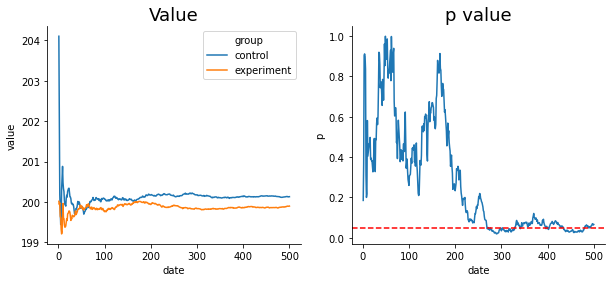

In [258]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
sns.lineplot(data = daily_data, x = "date", y = "value", hue = "group",
    ax = axes[0])
axes [0].set_title("Value", fontsize = 18)

sns.lineplot(data = stat_result, x = 'date', y = 'p',
    ax = axes[1])
axes[1].axhline(0.05, ls = '--', color = 'red')
axes[1].set_title("p value", fontsize = 18)

                      
plt.subplots_adjust(hspace = 0.3)
sns.despine()

Еще не стоит забывать о том, что помимо рассмотренной ошибки первого рода об отвержении верной гипотезы, в качестве дополнительной проверки стоит рассматривать вероятность ошибки второго рода, т. е. принять неверную гипотезу. Она заключается в левой части пересечения графиков.

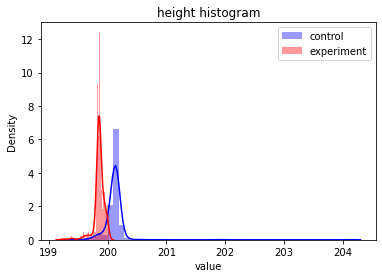

In [365]:
sns.distplot(daily_data[daily_data['group'] == 'control']['value'], color = 'blue', label = 'control')
sns.distplot(daily_data[daily_data['group'] == 'experiment']['value'], color = 'red', label = 'experiment')
plt.title('height histogram')
plt.legend()
plt.show()

Предположим, что мы сделали случайную выборку из 1000 человек в городе, и 610 из них оказались женщинами.<br>
Сделаем предположение, что в городе женщин и мужчин одинаковое количество, и с помощью критерия хи-квадрат можно узнать, с какой долей вероятности можно так утверждать.

In [302]:
N = 1000
females = 610
males = N - 610
observed = [females, males]
expected = [N/2, N/2]
sc.stats.chisquare(observed, expected)

Power_divergenceResult(statistic=48.4, pvalue=3.4756819462822346e-12)

In [303]:
females = 610
males = N - 610
observed = [females, males]
while(sc.stats.chisquare(observed, expected)[1] < 0.5):
    females -= 1
    males += 1
    observed = [females, males]
#     print('Females: %.0f'% females, 'Males: %.0f' % males, 'p value %.0f: ', sc.stats.chisquare(observed, expected)[1])

Рассмотрим пример: первой группе пациентов давали плацебо и в 15 из 62 случаев наблюдали побочные эффекты, второй группе пациентов давали препарат и в 28 из 59 случаев наблюдали побочные эффекты. <br>
Проверим двумя разными критериями, принадлежат ли наши наблюдения одному и тому же распределению.<br>
При p-value < 0.05 можно утверждать, что наблюдения принадлежат разным распределениям.

In [355]:
observed1 = [15, 47]
observed2 = [28, 31]
data = np.array([observed1, observed2])
print('chi2 p-value: %.5f' %sc.stats.chi2_contingency(data)[1],
      'fisher p-value: %.5f' %sc.stats.fisher_exact(np.array([observed1, observed2]))[1])

chi2 p-value: 0.01305 fisher p-value: 0.00846


In [ ]:
Зачастую, данные имеют нормальное распределение. Приведем несколько примеров критериев таких оценок.

In [305]:
N = 100
female_height = np.random.normal(165, 5, N)
male_height = np.random.normal(180, 5, N)

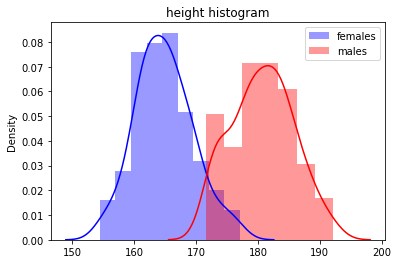

In [307]:
sns.distplot(female_height, color = 'blue', label = 'females')
sns.distplot(male_height, color = 'red', label = 'males')
plt.title('height histogram')
plt.legend()
plt.show()

Прорверим, с какой долей уверенности можно говорить, что женщины имеют средний вес = 165 при данной выборке.

In [308]:
expected_mean_height = 165
sc.stats.ttest_1samp(female_height, expected_mean_height)

Ttest_1sampResult(statistic=-0.2541364535184373, pvalue=0.7999172325997208)

Прорверим, с какой долей уверенности можно говорить, что женщины имеют средний вес = 180 при данной выборке.

In [309]:
expected_mean_height = 180
sc.stats.ttest_1samp(female_height, expected_mean_height)

Ttest_1sampResult(statistic=-32.756248169464634, pvalue=6.227834670234977e-55)

А также проверим, принадлежат имеют ли средние веса мужчин и женщин одинаковое распределение.

In [310]:
sc.stats.ttest_ind(female_height, male_height)

Ttest_indResult(statistic=-23.290790141786907, pvalue=1.2852260042007342e-58)

Ниже приведем сравнение на одинаковость дисперсий распределений.

In [332]:
N = 100
ice_cream1 = np.random.normal(50, 5, N)
ice_cream2 = np.random.normal(50, 6, N)

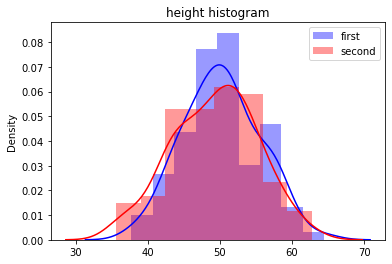

In [333]:
sns.distplot(ice_cream1, color = 'blue', label = 'first')
sns.distplot(ice_cream2, color = 'red', label = 'second')
plt.title('height histogram')
plt.legend()
plt.show()

In [334]:
F= ice_cream1.var(ddof = 1) / ice_cream2.var(ddof = 1)
df1 = len(ice_cream1) - 1
df2 = len(ice_cream2) - 1
p_value = sc.stats.f.cdf(F, df1, df2)
print('p-value: {:.10f}'.format(p_value))

p-value: 0.1601731091


Желательно перед применением тестов на нормальность проверять, принадлежат ли данные нормальному распределению, т.к. некоторые критерии завязаны на предположении, что данные нормально расспределены.

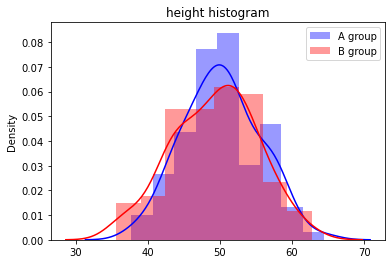

In [356]:
N = 100
X0 = np.random.normal(28, 21, N)
Y0 = np.random.normal(35, 21, N)
sns.distplot(ice_cream1, color = 'blue', label = 'A group')
sns.distplot(ice_cream2, color = 'red', label = 'B group')
plt.title('height histogram')
plt.legend()
plt.show()

In [357]:
sc.stats.normaltest(X0)

NormaltestResult(statistic=1.3899213214918427, pvalue=0.4990940815878325)

In [358]:
sc.stats.normaltest(Y0)

NormaltestResult(statistic=0.853281840107821, pvalue=0.6526978808739008)

In [359]:
sc.stats.shapiro(X0)

ShapiroResult(statistic=0.983686625957489, pvalue=0.2544209659099579)

In [360]:
sc.stats.shapiro(Y0)

ShapiroResult(statistic=0.991191565990448, pvalue=0.7600573897361755)

In [362]:
sc.stats.mannwhitneyu(X0, Y0)

MannwhitneyuResult(statistic=4564.0, pvalue=0.28728527598917153)

In [363]:
sc.stats.kruskal(X0, Y0)

KruskalResult(statistic=1.134901492537324, pvalue=0.286732251363608)